In [2]:
import pandas as pd
df = pd.read_csv('AER_credit_card_data.csv')
col_names = df.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
df.head()

Column names:
['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner', 'selfemp', 'dependents', 'months', 'majorcards', 'active']

Sample data:


,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:

df['card'].unique()

array(['yes', 'no'], dtype=object)

In [4]:
df['card'].unique()

array(['yes', 'no'], dtype=object)

In [5]:
df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [6]:
df.isnull().any()

card           False
reports        False
age            False
income         False
share          False
expenditure    False
owner          False
selfemp        False
dependents     False
months         False
majorcards     False
active         False
dtype: bool

In [7]:
df.shape

(1319, 12)

In [8]:
df['card'].value_counts()

card
yes    1023
no      296
Name: count, dtype: int64

In [10]:
df.groupby('card')['owner'].value_counts(normalize=True)
df.groupby('card')['selfemp'].value_counts(normalize=True)

card  selfemp
no    no         0.905405
      yes        0.094595
yes   no         0.938416
      yes        0.061584
Name: proportion, dtype: float64

Text(0, 0.5, 'Frequency of Approval')

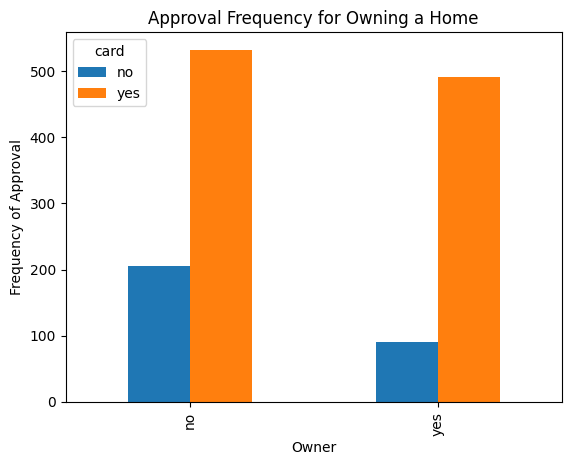

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df.owner,df.card).plot(kind='bar')
plt.title('Approval Frequency for Owning a Home')
plt.xlabel('Owner')
plt.ylabel('Frequency of Approval')

Text(0, 0.5, 'Proportion of Approval')

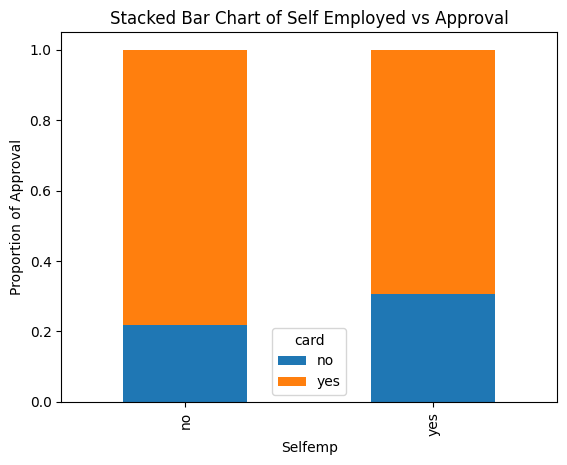

In [12]:
table=pd.crosstab(df.selfemp, df.card)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Self Employed vs Approval')
plt.xlabel('Selfemp')
plt.ylabel('Proportion of Approval')

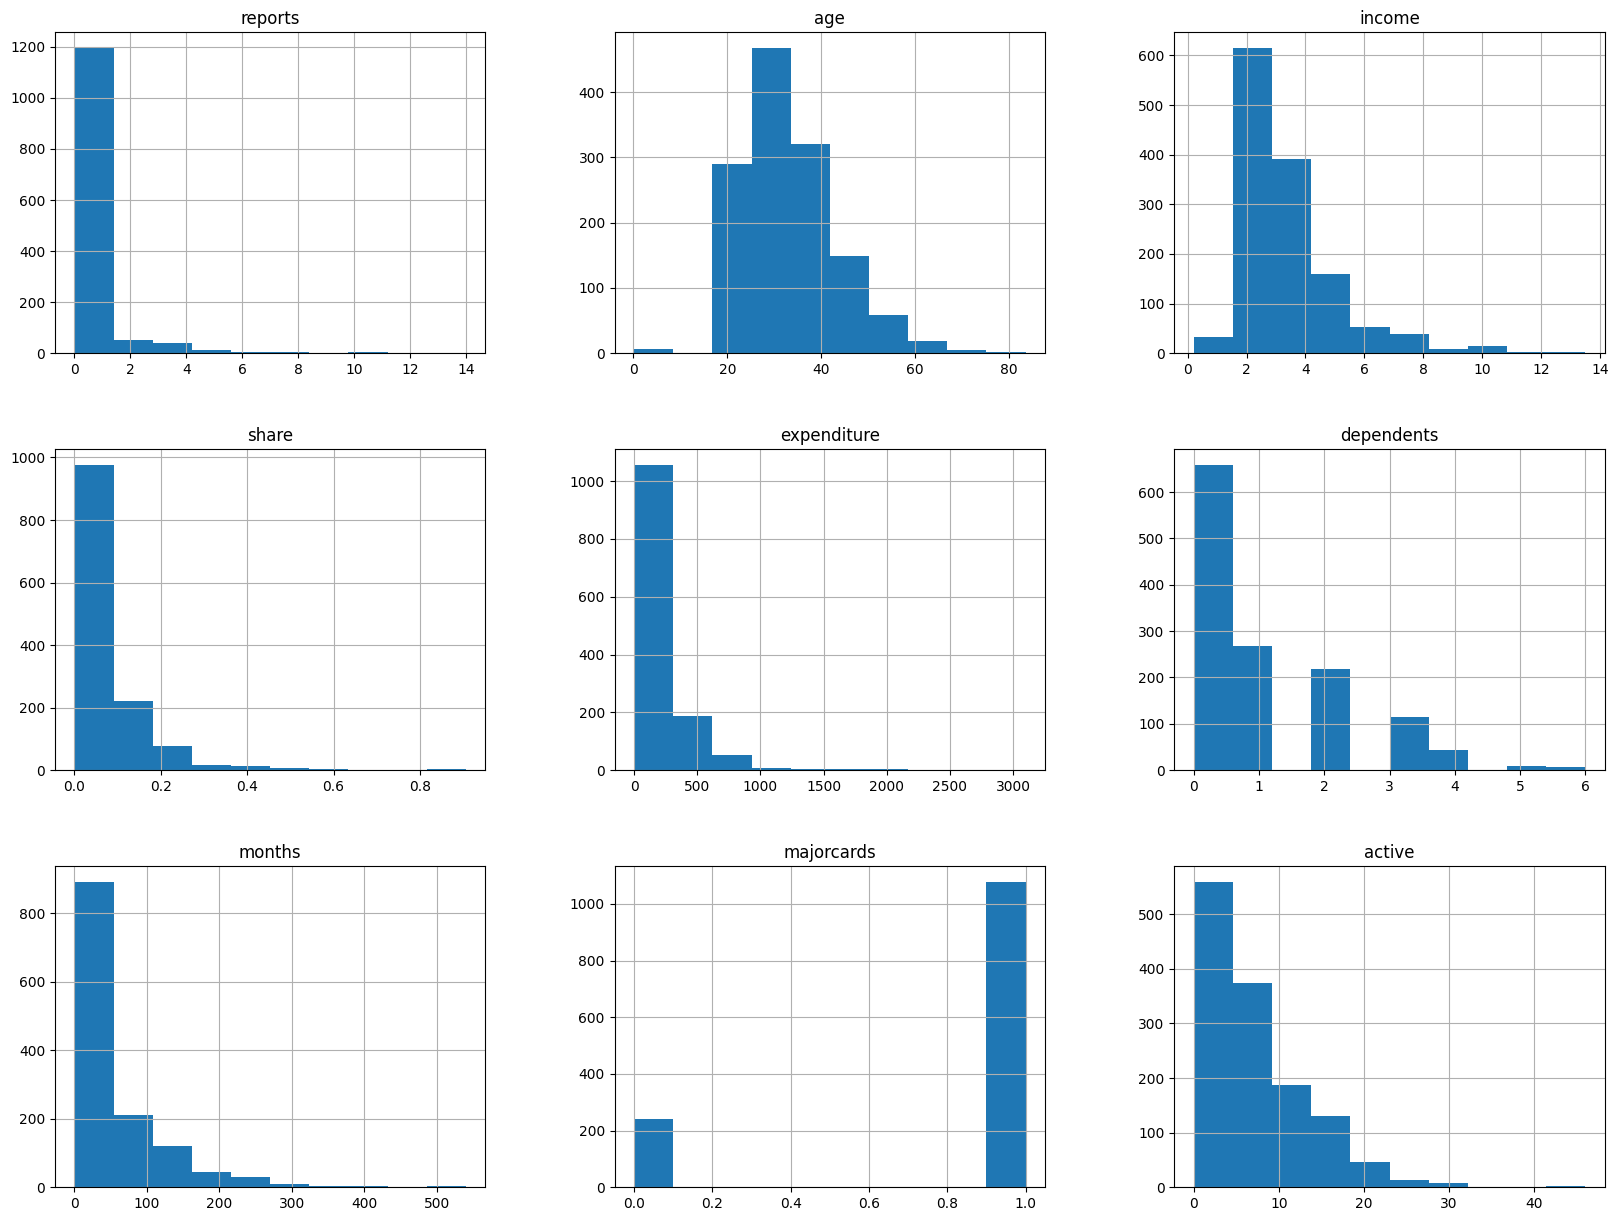

In [13]:
num_bins = 10

df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("df_histogram_plots")
plt.show()

In [14]:
cat_vars=['owner','selfemp']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
    
cat_vars=['owner','selfemp']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [15]:
df_final=df[to_keep]
df_final.columns.values

array(['card', 'reports', 'age', 'income', 'share', 'expenditure',
       'dependents', 'months', 'majorcards', 'active', 'owner_no',
       'owner_yes', 'selfemp_no', 'selfemp_yes'], dtype=object)

In [19]:
from imblearn.over_sampling import SMOTE

X = df_final.loc[:, df_final.columns != 'card']
y = df_final.loc[:, df_final.columns == 'card']

# Create an SMOTE instance (optional: adjust parameters as needed)
os = SMOTE(random_state=42)

# Apply oversampling
os_data_X, os_data_y = os.fit_resample(X, y)

os_data_X = pd.DataFrame(data=os_data_X, columns=X.columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['card'])


In [20]:
print("length of oversampled data is ",len(os_data_X))
print("Number of no card in oversampled data",len(os_data_y[os_data_y['card']==0]))
print("Number of card",len(os_data_y[os_data_y['card']==1]))
print("Proportion of no card data in oversampled data is ",len(os_data_y[os_data_y['card']==0])/len(os_data_X))
print("Proportion of card data in oversampled data is ",len(os_data_y[os_data_y['card']==1])/len(os_data_X))

length of oversampled data is  2046
Number of no card in oversampled data 0
Number of card 0
Proportion of no card data in oversampled data is  0.0
Proportion of card data in oversampled data is  0.0


In [21]:
X=os_data_X
y=os_data_y

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

k-Nearest Neighbors

C:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self

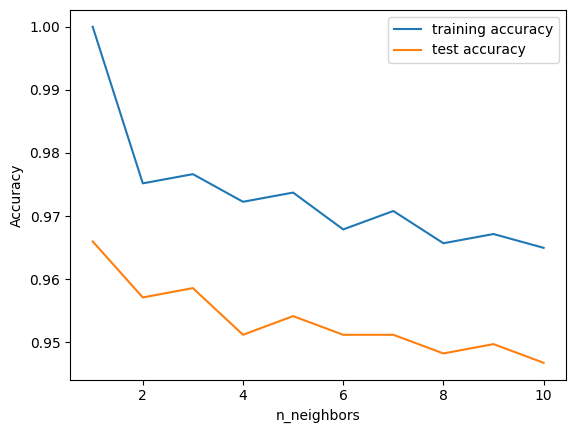

In [22]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [23]:
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

C:\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [24]:
y_pred = knn.predict(X_test)
print('k-Nearest Neighbors accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred)))

k-Nearest Neighbors accuracy: 0.959


Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

C:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [26]:

y_pred1 = rf.predict(X_test)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred1)))

Random Forest Accuracy: 0.988


Support Vector Machine

In [27]:
from sklearn.svm import SVC

svc = SVC(probability=True,random_state=42)
svc.fit(X_train, y_train)

C:\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True, random_state=42)

In [28]:
y_pred2 = svc.predict(X_test)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, y_pred2)))

Support vector machine accuracy: 0.941


Cross Validation


In [31]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
modelCV = RandomForestClassifier()
kfold = model_selection.KFold(n_splits=10, shuffle=False)
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(esti

10-fold cross validation average accuracy: 0.989


Precision and recall

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

          no       0.98      1.00      0.99       335
         yes       1.00      0.98      0.99       341

    accuracy                           0.99       676
   macro avg       0.99      0.99      0.99       676
weighted avg       0.99      0.99      0.99       676



In [41]:
import tensorflow as tf

def preprocess_data(data):
  # Your data preprocessing steps
  ...

  # Force float32 data type
  data = tf.cast(data, dtype=tf.float32)
  return data

# Use the preprocessed data in your model training loop


In [43]:
from imblearn.over_sampling import SMOTE

# Create an SMOTE instance (optional: adjust parameters as needed)
smote = SMOTE(random_state=42)

# Apply oversampling (X_train and y_train are your training data)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

forest_cm = confusion_matrix(y_test ,y_pred1, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["card - 1", "no-card - 0"] , yticklabels = ["card - 1", "no-card - 0"],
           cmap='RdPu')

plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

TypeError: too many positional arguments